<a href="https://colab.research.google.com/github/raju-sharma/Game_of_life/blob/main/SVM_UnderWater_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
# !pip install librosa

In [186]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import os
import numpy as np
import pandas as pd

In [187]:
# !unzip UnderWater_Dataset.zip

In [188]:
filename = "UnderWater_Dataset/KillerWhale/60026003.wav"


In [189]:
data, sample_rate = librosa.load(filename)
ipd.Audio(data,rate=sample_rate)

In [190]:
print(data,sample_rate)

[0.00318003 0.00665283 0.00788284 ... 0.02308168 0.01698721 0.00993906] 22050


In [191]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=100)
print(mfccs.shape)

(100, 55)


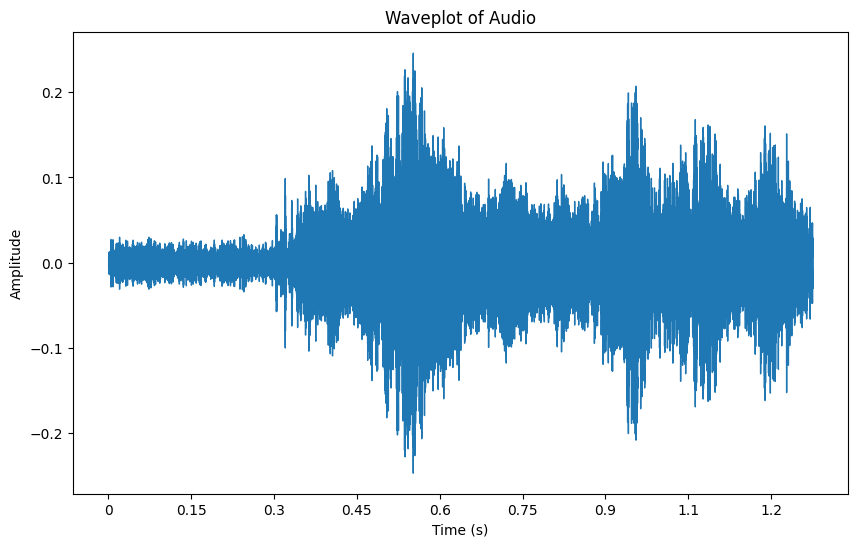

In [192]:
plt.figure(figsize=(10, 6))
librosa.display.waveshow(data, sr=sample_rate)
plt.title('Waveplot of Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [193]:
file_names=[]
base_directory = 'UnderWater_Dataset'
# Folder name containing the audio files
folder_name = ['BeardSeal','BowheadWhale','CommonDolphin','HarpSeal','HumpbackWhale','KillerWhale','LeapordSeal','SpinnerDolphin','Walrus','WhitebeakedDolphin']
# Get the list of files within the folder
for name in folder_name :
  folder_path = os.path.join(base_directory, name)
  file_names.append(os.listdir(folder_path))
  # Initialize a list to store the full absolute paths
# print((file_names))


In [194]:
# Construct the full absolute paths
audio_files = []
label_data = []
i = 0
for name in folder_name :
  folder_name[i] = os.path.join(base_directory, name)
  i += 1
i = 0
for file_name in file_names:
  for voice in file_name :
    full_path = os.path.join(folder_name[i], voice)
    audio_files.append(full_path)
    label_data.append(i);
  i += 1
# audio_files

In [195]:
# print(label_data)

In [196]:
loaded_data = []
sample_rates = []
i = 0
flag = False
for file_path in audio_files:
    data, sample_rate = librosa.load(file_path)
    mfccs_features = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=100)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    loaded_data.append([mfccs_scaled_features,label_data[i]])
    i += 1
    sample_rates.append(sample_rate)

In [197]:
# loaded_data

In [198]:
extracted_features_df=pd.DataFrame( loaded_data,columns=['feature','class'])
# extracted_features_df.head(5)

In [199]:
import numpy as np
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [200]:
# len(X[3])

In [201]:
# y

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 198)

In [203]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [204]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [205]:
y_pred = classifier.predict(X_test)

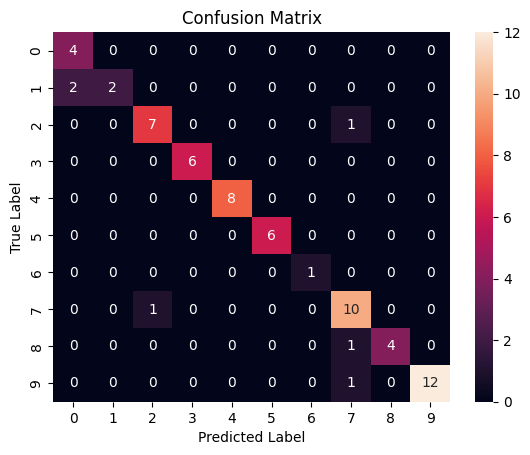

In [206]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [207]:
accuracy_score(y_test,y_pred)

0.9090909090909091